# Leave-one-center-out

In [19]:
import numpy as np
import os
import sys
import glob
import pandas as pd
from pathlib import Path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.metrics.metrics import ModelPerformance, Metrics

model_name = 'ProjNetMerged4'
filepaths = glob.glob('/media/brainstimmaps/DATA/2009_DeepMaps01/04_Source/01_Development/deepmaps/'
    f'models/predict_loco/{model_name}/csv/*')

filepaths.sort()

filepath = filepaths[-1]

print(filepath)
#mp = ModelPerformance.load(filepath=filepath)
#mp['Model'] = model_name

df_loco = pd.read_csv(filepath)
#df_loco = df_loco[df_loco['tweening'] == False]
df_loco = df_loco[df_loco['noisy'] == False]
df_loco = df_loco.drop(columns = ['massive_filename'])


levels = (0, 16, 17, 7, 8, 18, 19, 15)
contacts = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15)
contact_to_levels = {
    0 : 0,
    16 : 1,
    17 : 2,
    7 : 3,
    8 : 0,
    18 : 1,
    19 : 2,
    15 : 3}
contact_to_hemisphere_lvl = {
    0 : 'right',
    16 : 'right',
    17 : 'right',
    7 : 'right',
    8 : 'left',
    18 : 'left',
    19 : 'left',
    15 : 'left'}
contact_to_hemisphere_vercise = {
    0 : 'right', # R0R
    1 : 'right', # R1_0R
    2 : 'right', # R1_1R
    3 : 'right', # R1_2R
    4 : 'right', # R2_0R
    5 : 'right', # R2_1R
    6 : 'right', # R2_2R
    7 : 'right', # R3R
    8 : 'left',  # R0L
    9 : 'left',  # R1_0L
    10 : 'left', # R1_1L
    11 : 'left', # R1_2L
    12 : 'left', # R2_0L
    13 : 'left', # R2_1L
    14 : 'left', # R2_2L
    15 : 'left', # R3L
    16 : 'right',# R1R
    17 : 'right',# R2R
    18 : 'left', # R1L
    19 : 'left'  # R2L
    }

df_loco['hemisphere'] = df_loco['verciseID'].map(contact_to_hemisphere_vercise)

/media/brainstimmaps/DATA/2009_DeepMaps01/04_Source/01_Development/deepmaps/models/predict_loco/ProjNetMerged4/csv/23.09.13.17:08:28_es.csv


In [20]:
df_loco

,centerID,leadModel,patientID,contactID,verciseID,amplitude,mapping,mapping_score,part,lin_interp_score,...,zeroed,tweening,tuning,noisy,original_vta,added_voxels,total_voxels,prediction_rounded,prediction,hemisphere
0,Bern,Boston Scientific Vercise,1.0,0.0,0,1.0,0.0,NaN,1.0,0.074074,...,0.0,False,False,False,NaN,0,9.0,0.0,0.003231,right
1,Bern,Boston Scientific Vercise,1.0,0.0,0,1.1,0.0,NaN,1.0,0.081481,...,0.0,True,False,False,NaN,0,9.0,0.0,0.003219,right
2,Bern,Boston Scientific Vercise,1.0,0.0,0,1.2,0.0,NaN,1.0,0.088889,...,0.0,True,False,False,NaN,0,9.0,0.0,0.003231,right
3,Bern,Boston Scientific Vercise,1.0,0.0,0,1.4,0.0,NaN,1.0,0.103704,...,0.0,True,False,False,NaN,0,36.0,0.0,0.000144,right
4,Bern,Boston Scientific Vercise,1.0,0.0,0,1.5,0.0,NaN,1.0,0.111111,...,0.0,False,False,False,NaN,0,36.0,0.0,0.000144,right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24199,Cologne,Boston Scientific Vercise,240.0,3.0,3,3.9,0.0,NaN,1.0,0.500000,...,0.0,True,False,False,NaN,0,255.0,0.0,0.300902,right
24200,Cologne,Boston Scientific Vercise,240.0,3.0,3,4.0,1.0,0.5,1.0,0.500000,...,0.0,False,False,False,NaN,0,255.0,0.0,0.300902,right
24201,Cologne,Boston Scientific Vercise,240.0,3.0,3,4.1,0.0,NaN,0.0,0.500000,...,0.0,True,False,False,NaN,0,255.0,0.0,0.300902,right
24202,Cologne,Boston Scientific Vercise,240.0,3.0,3,4.7,0.0,NaN,0.0,0.500000,...,0.0,True,False,False,NaN,0,528.0,0.0,0.114137,right


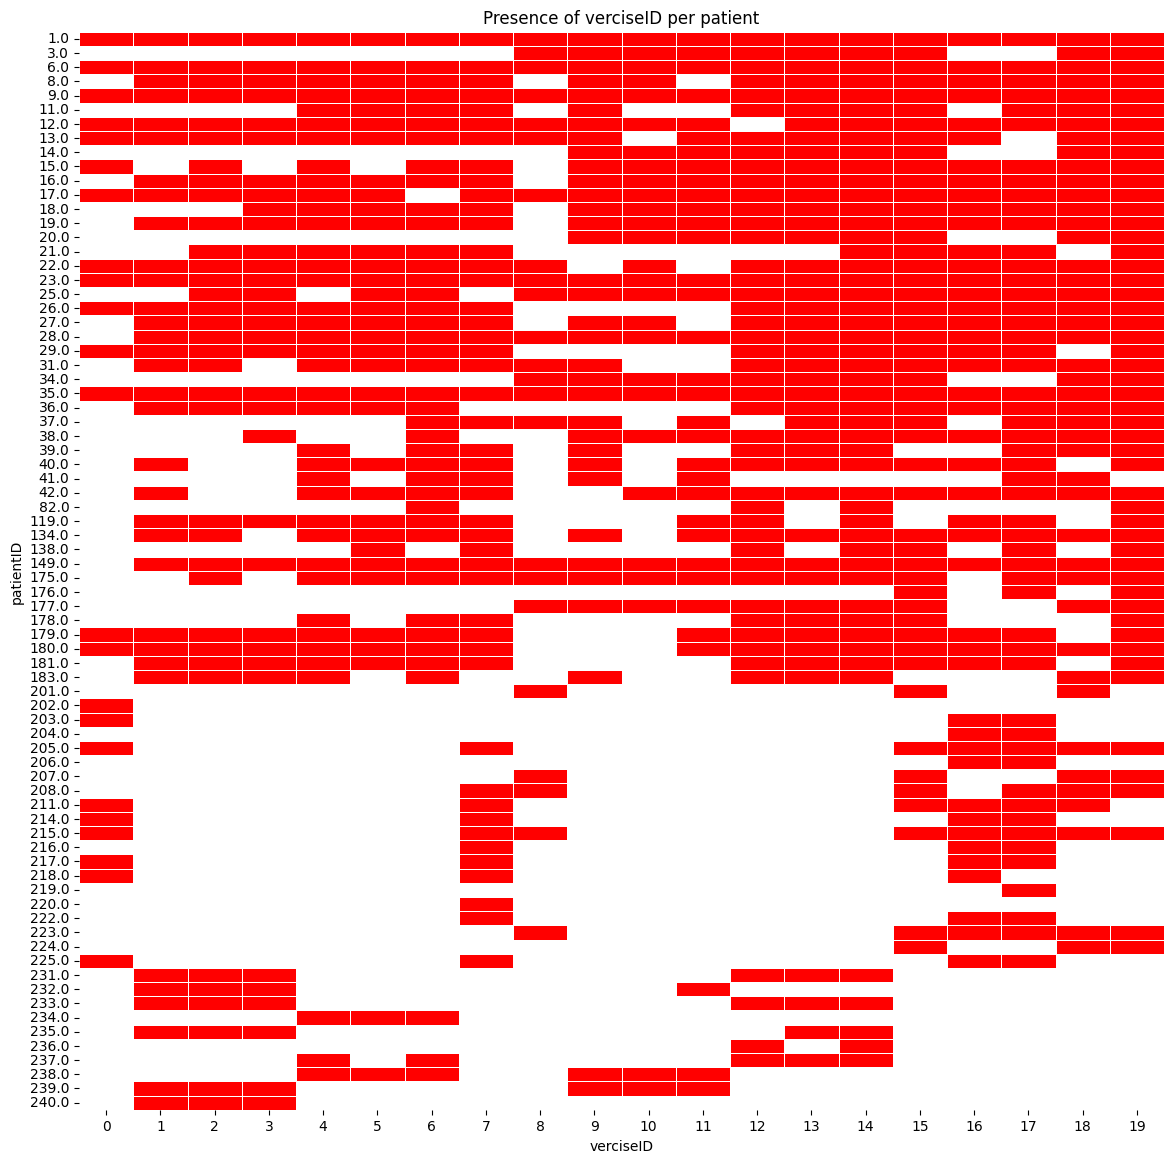

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/media/brainstimmaps/DATA/2009_DeepMaps01/04_Source/01_Development/deepmaps/data/processed/stn_space_3sigma_subtracted_tweened/merged/flipped/VTAs/1000um_table.csv')

df_dir = df[df['leadModel'] == 'Boston Scientific Vercise']
# Create a pivot table
pivot_df = pd.crosstab(df['patientID'], df['verciseID'], rownames=['patientID'], colnames=['verciseID'])

# Fill missing columns with zeros to ensure all 'verciseID' are present
for col in range(0, 20):  # Assuming verciseID ranges from 0 to 19
    if col not in pivot_df.columns:
        pivot_df[col] = 0

# Sort the columns
pivot_df = pivot_df[sorted(pivot_df.columns)]

# Plotting heatmap
plt.figure(figsize=(14, 14))
sns.heatmap(pivot_df, cmap=['white', 'red'], linewidths=.5, cbar=False, annot=False, fmt='d')
plt.xlabel("verciseID")
plt.ylabel("patientID")
plt.title("Presence of verciseID per patient")
plt.show()


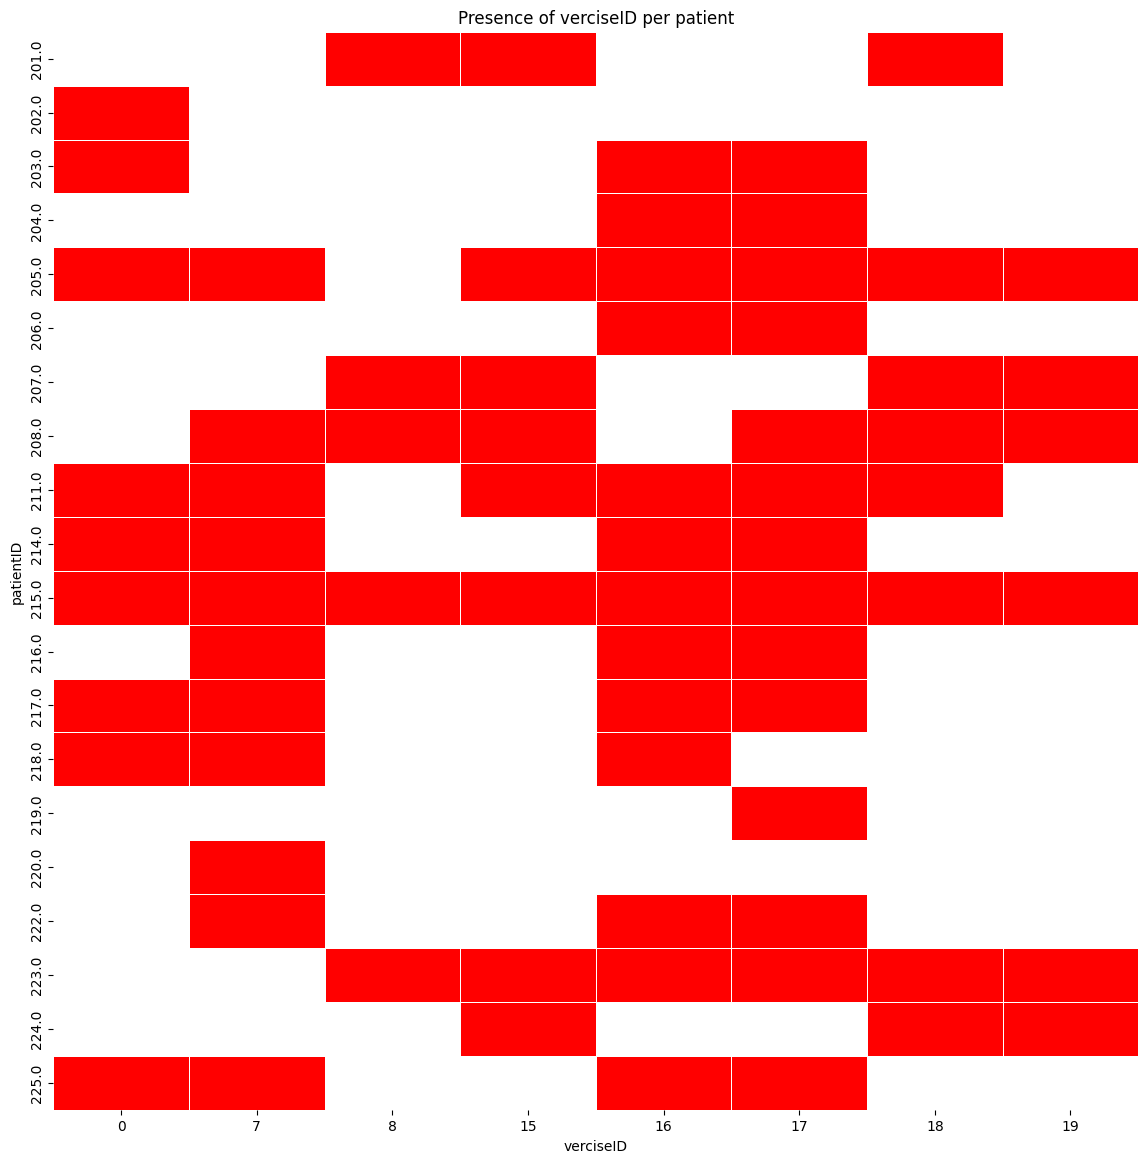

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/media/brainstimmaps/DATA/2009_DeepMaps01/04_Source/01_Development/deepmaps/data/processed/stn_space_3sigma_subtracted_tweened/merged/flipped/VTAs/1000um_table.csv')

df = df[df['leadModel'] == 'Medtronic 3389']
# Create a pivot table
pivot_df = pd.crosstab(df['patientID'], df['verciseID'], rownames=['patientID'], colnames=['verciseID'])

# Fill missing columns with zeros to ensure all 'verciseID' are present
for col in (0, 16, 17, 7, 8, 18, 19, 15):  # Assuming verciseID ranges from 0 to 19
    if col not in pivot_df.columns:
        pivot_df[col] = 0

# Sort the columns
pivot_df = pivot_df[sorted(pivot_df.columns)]

# Plotting heatmap
plt.figure(figsize=(14, 14))
sns.heatmap(pivot_df, cmap=['white', 'red'], linewidths=.5, cbar=False, annot=False, fmt='d')
plt.xlabel("verciseID")
plt.ylabel("patientID")
plt.title("Presence of verciseID per patient")
plt.show()


In [22]:
df_loco.groupby(['patientID', 'contactID']).ngroups

777

In [26]:
import pandas as pd
import numpy as np
import scipy.stats

def spearman_correlation(group, pred_col='prediction'):
        # Calculate Spearman's correlation for the group
        rho, _ = scipy.stats.spearmanr(group['time'], group[pred_col])
        return rho

def compute_rank_rho(df, lopo=False):
    # Sort by 'amplitude' within each group and then rank to create 'time' column

    df['time'] = df.groupby(['centerID', 'patientID', 'hemisphere'])['amplitude'].rank().astype(int)

    # Calculate Spearman's rho for each centerID using 'prediction'
    grouped = df.groupby(['centerID', 'patientID', 'hemisphere', 'contactID']).apply(lambda group: spearman_correlation(group, 'prediction')).reset_index(name='spearman_rho')
    #print(grouped)
    agg_results = grouped.groupby('centerID')['spearman_rho'].agg(['mean', 'std']).reset_index()
    if lopo:
    # Calculate Spearman's rho for 'merged' using 'merged_prediction'
        # Calculate Spearman's rho for 'merged' using 'merged_prediction'
        grouped_merged = df.groupby(['patientID', 'hemisphere', 'contactID']).apply(lambda group: spearman_correlation(group, 'merged_prediction')).reset_index(name='spearman_rho')
        agg_results_merged_mean = grouped_merged['spearman_rho'].mean()
        agg_results_merged_std = grouped_merged['spearman_rho'].std()

        # Create a DataFrame for the 'merged' results in the same format as agg_results
        agg_results_merged = pd.DataFrame({'centerID': ['merged'], 'mean': [agg_results_merged_mean], 'std': [agg_results_merged_std]})

        # Concatenate the original agg_results with the new agg_results for 'merged'
        final_agg_results = pd.concat([agg_results, agg_results_merged], ignore_index=True)

    else:
        final_agg_results = agg_results

    return final_agg_results, grouped

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

loco, _ = compute_rank_rho(df_loco, lopo=False)
print(loco)

  centerID      mean       std
0     Bern  0.761140  0.233310
1  Cologne  0.557151  0.350857


In [ ]:
print(g1)

    centerID  patientID hemisphere  spearman_rho
0       Bern        1.0       left      0.805914
1       Bern        1.0      right      0.695435
2       Bern        3.0       left      0.683556
3       Bern        6.0       left      0.762964
4       Bern        6.0      right      0.854567
..       ...        ...        ...           ...
124  Cologne      238.0       left      0.616326
125  Cologne      238.0      right      0.805589
126  Cologne      239.0       left      0.756588
127  Cologne      239.0      right      0.799118
128  Cologne      240.0      right      0.463809

[129 rows x 4 columns]


In [ ]:
loco_map

,centerID,mean,std,type
0,Bern,0.727032,0.133609,mapping
1,Cologne,0.559617,0.221490,mapping


# Leave-on-patient-out

In [29]:
model_name = 'ProjNetMerged4'
filepaths = glob.glob('/media/brainstimmaps/DATA/2009_DeepMaps01/04_Source/01_Development/deepmaps/'
    f'models/predict_lopo/{model_name}/csv/*')

filepaths.sort()

filepath = filepaths[-1]

print(filepath)
#mp = ModelPerformance.load(filepath=filepath)
#mp['Model'] = model_name

df_lopo = pd.read_csv(filepath)
#df_lopo = df_lopo[df_lopo['tweening'] == False]
df_lopo = df_lopo[df_lopo['noisy'] == False]

df_lopo = df_lopo.drop(columns = ['massive_filename'])
#df = df[['patientID', 'hemisphere', 'contactID', 'amplitude', 'label', 'prediction']]
df_lopo['hemisphere'] = df_lopo['verciseID'].map(contact_to_hemisphere_vercise)

/media/brainstimmaps/DATA/2009_DeepMaps01/04_Source/01_Development/deepmaps/models/predict_lopo/ProjNetMerged4/csv/23.09.13.17:26:26_es.csv


In [ ]:
lopo, _ = compute_rank_rho(df_lopo, lopo=True)

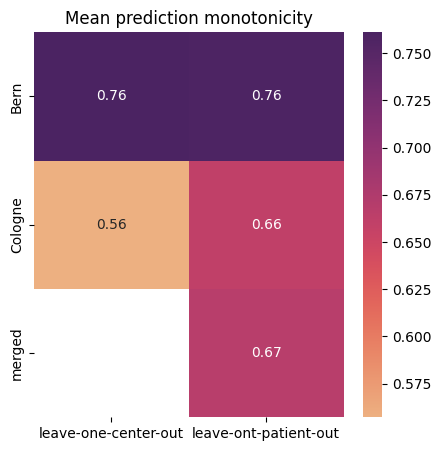

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
loco['type'] = 'leave-one-center-out'

lopo['type'] = 'leave-ont-patient-out'

# Merge DataFrames
merged_df = pd.concat([loco, lopo]).reset_index(drop=True)

# Pivot DataFrame
pivot_df = merged_df.pivot(index='centerID', columns='type', values='mean')

# Create Heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(pivot_df, annot=True, cmap='flare', fmt=".2f")
plt.title('Mean prediction monotonicity')
plt.ylabel('')
plt.xlabel('')
plt.show()


In [ ]:

# Concatenating the DataFrames
final_df = pd.concat([lopo_map, lopo_full], ignore_index=True)

# Pivoting the DataFrame for heatmap
heatmap_data = final_df.pivot(index='centerID', columns='type', values='mean')

# Creating the heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar=True, square=True)
plt.title("Leave-one-patient-out mean \nSpearman's rho by center and type")
plt.show()
